In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from plotnine import *

In [2]:
cols=['Bag class' , 'Bag ID']
features=[]
for i in range(1,167):
    feat='Feature '+ str(i)
    features=np.append(features,feat)
    cols=np.append(cols,feat)
d1= pd.read_csv(r"C:\Users\ubtn\Desktop\IE-05\Data Mining\HW2\Data\Musk1.csv",header=None)
xx=d1.values
df=pd.DataFrame(xx,columns=cols)
df.head()

,Bag class,Bag ID,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166
0,1,1,42,-198,-109,-75,-117,11,23,-88,...,-238,-74,-129,-120,-38,30,48,-37,6,30
1,1,1,42,-191,-142,-65,-117,55,49,-170,...,-238,-302,60,-120,-39,31,48,-37,5,30
2,1,1,42,-191,-142,-75,-117,11,49,-161,...,-238,-73,-127,-120,-38,30,48,-37,5,31
3,1,1,42,-198,-110,-65,-117,55,23,-95,...,-238,-302,60,-120,-39,30,48,-37,6,30
4,1,2,42,-198,-102,-75,-117,10,24,-87,...,-238,-73,-127,51,128,144,43,-30,14,26


In [3]:
df.loc[:, features].describe(include='all')              #Descriptive Statistics of the Featues

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,...,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,38.731092,-120.142857,-79.243697,15.903361,-112.298319,-9.760504,-16.628151,7.762605,-91.048319,-76.077731,...,-221.728992,-204.405462,-108.262605,-25.231092,37.428571,79.752101,85.363445,-34.128151,-26.241597,33.714286
std,18.087948,88.313464,69.172519,75.515959,28.704947,92.025496,106.560891,75.786461,96.321303,72.467693,...,63.021801,89.566426,121.794583,65.588295,87.315888,49.269244,47.487575,16.019277,58.009205,54.189087
min,-9.000000,-199.000000,-166.000000,-115.000000,-117.000000,-184.000000,-170.000000,-231.000000,-242.000000,-284.000000,...,-252.000000,-324.000000,-217.000000,-135.000000,-126.000000,-78.000000,35.000000,-132.000000,-258.000000,-72.000000
25%,31.000000,-193.000000,-144.000000,-53.000000,-117.000000,-89.000000,-159.000000,-9.250000,-215.000000,-118.250000,...,-240.000000,-264.000000,-208.000000,-91.000000,-39.250000,33.000000,54.000000,-42.250000,-28.000000,-12.000000
50%,42.000000,-144.500000,-108.000000,28.000000,-117.000000,11.000000,41.000000,18.000000,-41.000000,-73.500000,...,-236.000000,-236.000000,-189.500000,-15.000000,31.500000,84.000000,69.000000,-36.000000,-11.000000,35.000000
75%,50.000000,-101.000000,-21.000000,38.000000,-117.000000,70.250000,51.000000,57.000000,-30.000000,-28.000000,...,-232.000000,-154.750000,30.000000,22.000000,128.000000,119.000000,99.000000,-28.000000,7.000000,74.000000
max,130.000000,98.000000,83.000000,157.000000,238.000000,200.000000,214.000000,188.000000,135.000000,218.000000,...,141.000000,72.000000,173.000000,185.000000,253.000000,291.000000,302.000000,24.000000,82.000000,235.000000


In [5]:
#Standardize Data (Each Feature Column should have approximately 0 mean and 1 variance afterwards.)
std_x = df.loc[:, features].values
std_y = df.loc[:,['Bag ID']].values
std_x = StandardScaler().fit_transform(std_x)
df_std= pd.DataFrame(data = std_x, columns = features)

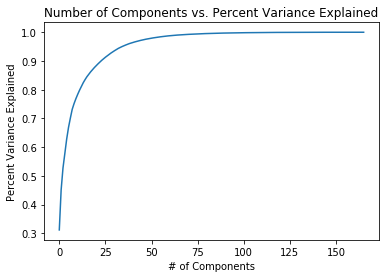

In [6]:
#Before performing PCA, decide on number of components to plot.
pca=PCA()
variance = pca.fit(std_x)
plt.plot(np.cumsum(variance.explained_variance_ratio_))
plt.xlabel('# of Components')
plt.ylabel('Percent Variance Explained') #for each component
plt.title('Number of Components vs. Percent Variance Explained')
plt.show()

This means that if we want to explain approximately 90% of the variance in the data, we need 25D plot (25 Pricipal Components)
Since it is difficult to visualize in 25D, let's visualize in 2D and see how good the PCA is.

In [7]:
#Perform Principal Component Analysis 2D 
pca=PCA(n_components = 2)
pca_data = pca.fit_transform(std_x)
principaldf = pd.DataFrame(data = pca_data , columns = ['Component 1', 'Component 2'])  #Principal Components
df_pca = pd.concat([principaldf, df['Bag ID']],axis=1)   #Add 'Bag class' as a Target Value to Principal Component Dataframe
df_pca.head()

,Component 1,Component 2,Bag ID
0,0.787850,8.664480,1
1,0.782505,8.544104,1
2,0.248081,8.360294,1
3,1.356422,9.106098,1
4,1.459051,8.685006,2


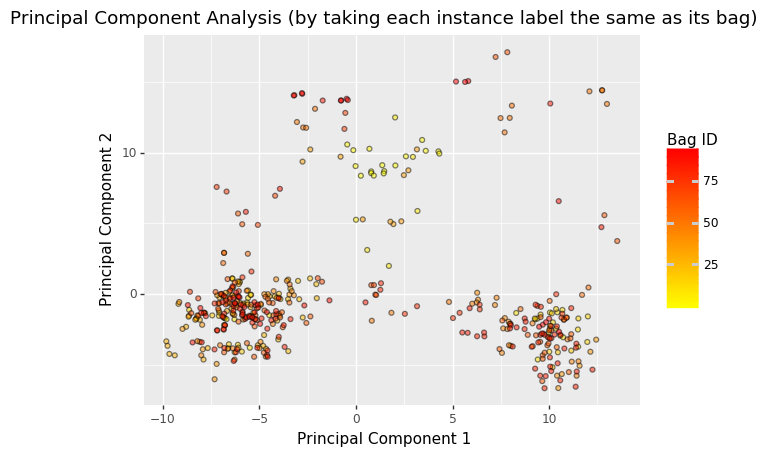

<ggplot: (-9223371940703341620)>

In [10]:
ggplot(
    df_pca) + geom_point(aes(x = 'Component 1',y = 'Component 2',fill = 'Bag ID'),alpha = 0.5) +labs(
        title ='Principal Component Analysis (by taking each instance label the same as its bag)',
        x = 'Principal Component 1',
        y = 'Principal Component 2',) +scale_fill_gradient(low="yellow",high="red")

In [11]:
explained_variance_c1=pca.explained_variance_ratio_[0]*100
explained_variance_c2=pca.explained_variance_ratio_[1]*100
sum_explained_variance=sum(pca.explained_variance_ratio_)*100
print('Principal Component 1 explains ' + str(round(explained_variance_c1,1)) + '% of the total variance')
print('Principal Component 2 explains ' + str(round(explained_variance_c2,1)) + '% of the total variance')
print('Total variance explained by the two components is ' + str(round(sum_explained_variance,1)) + '%')

Principal Component 1 explains 31.2% of the total variance
Principal Component 2 explains 13.9% of the total variance
Total variance explained by the two components is 45.1%


The two of the principal components can only explain 45.1% of the variance in the data. Therefore, we can comment that PCA is not a good measure while we take each instance label the same as the bag label (476 conformations). There may be nonlinear relationships in the data, which is better explained by MDS.

In [12]:
#Perform Multi Dimensional Scaling 2D
mds=MDS(n_components = 2)    
mds_transformed = mds.fit_transform(std_x)
MDSdf = pd.DataFrame(data = mds_transformed , columns = ['MDS_1', 'MDS_2'])  #Multi Dimensional Scaling Df
df_mds = pd.concat([MDSdf, df['Bag ID']],axis=1)         #Add 'Bag class' as a Target Value to MDS Dataframe
df_mds.head()

,MDS_1,MDS_2,Bag ID
0,-13.199411,1.850753,1
1,-12.870188,1.693353,1
2,-12.686278,1.140922,1
3,-13.520297,2.408303,1
4,11.847110,3.104517,2


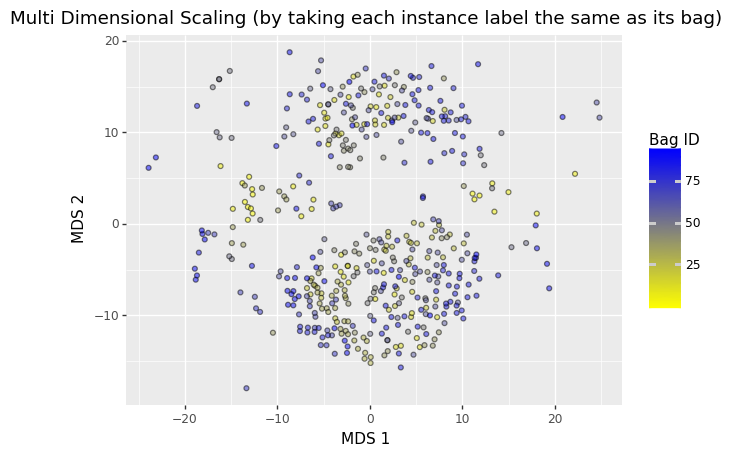

<ggplot: (-9223371940703253436)>

In [13]:
# MDS plot 1

ggplot(
    df_mds) + geom_point(aes(x = 'MDS_1',y = 'MDS_2',fill = 'Bag ID'),alpha = 0.5) +labs(
        title ='Multi Dimensional Scaling (by taking each instance label the same as its bag)',
        x = 'MDS 1',
        y = 'MDS 2',)+scale_fill_gradient(low="yellow",high="blue") 

It is difficult to distinguish musk and non musk bags from the graph. Then, it can be commented that neither PCA nor MDS works
well with the assumption of instance labels being the same as bag labels.

Task 1.b Perforom PCA and MDS (for each bag take the average of the instances)

In [14]:
df_mean=df.groupby(["Bag ID"]).apply(np.mean)
df_mean.head()

,Bag class,Bag ID,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166
Bag ID,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,42.000000,-194.500000,-125.750000,-70.000000,-117.0,33.000000,36.000000,-128.5,...,-238.000000,-187.75,-34.0,-120.000000,-38.500000,30.250000,48.000000,-37.000000,5.500000,30.250000
2,1.0,2.0,42.000000,-194.500000,-122.000000,-70.000000,-117.0,33.000000,36.250000,-128.0,...,-238.000000,-186.25,-32.5,51.000000,126.500000,143.500000,42.750000,-30.250000,14.000000,26.500000
3,1.0,3.0,42.000000,-166.000000,-102.500000,-30.500000,-116.5,5.000000,27.500000,-142.5,...,-235.500000,-57.50,-45.5,13.000000,120.500000,133.500000,55.500000,-32.500000,2.000000,16.500000
4,1.0,4.0,42.666667,-154.666667,-77.333333,-42.333333,-117.0,22.333333,21.666667,-132.0,...,-237.333333,-142.00,-15.0,-80.333333,-33.666667,31.333333,50.333333,-38.333333,5.333333,32.333333
5,1.0,5.0,61.500000,-72.500000,-102.000000,-25.250000,-34.0,19.000000,29.000000,-143.5,...,-237.750000,-117.25,-60.5,5.000000,75.750000,136.750000,68.500000,-26.750000,-0.250000,36.750000


In [15]:
#Standardize Data (Each Feature Column should have approximately 0 mean and 1 variance afterwards.)
std_x_m = df_mean.loc[:, features].values
std_y_m = df_mean.loc[:,['Bag ID']].values
std_x_m = StandardScaler().fit_transform(std_x_m)
df_std_m= pd.DataFrame(data = std_x_m, columns = features)
df_std_m.tail()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166
87,-1.833724,-0.910714,-0.948587,0.016270,-0.051276,-1.542931,1.403714,0.549951,1.492358,-0.203342,...,0.764815,0.358793,-1.107642,-1.505973,-1.304430,-1.296137,-0.075851,1.148359,0.761713,-0.096241
88,-0.804278,2.477316,2.035462,1.272677,-0.100205,-0.004455,0.444925,-1.575186,1.047377,-3.289727,...,-0.337621,-1.835927,-1.103455,0.619899,-0.113908,-0.159885,1.352788,-0.425905,-1.617928,1.113711
89,-0.748819,2.477316,2.048618,1.230923,-0.100205,0.352821,0.433852,-1.581635,1.039655,-1.529749,...,-0.374217,-1.796996,-0.895804,0.612659,-0.110419,-0.140462,1.379914,-0.397020,-1.647351,1.132543
90,-0.000131,-1.010507,-1.434600,1.831923,-0.206219,1.320141,-2.058937,-2.581321,-2.170136,-2.514652,...,-0.148545,-1.866747,-0.031707,-0.779852,0.051224,0.108801,0.435023,0.151806,-0.521895,-0.882475
91,0.353416,-0.102560,0.327472,-0.346228,0.034351,0.093978,-0.551698,0.611222,-0.132163,0.489301,...,6.194656,0.799197,-0.045104,0.370116,0.381489,0.769996,-0.279296,0.462326,0.460121,0.214486


In [16]:
#Perform Principal Component Analysis 2D
pca_m=PCA(n_components = 2)
pca_data_m = pca_m.fit_transform(std_x_m)
principaldf_m = pd.DataFrame(data = pca_data_m , columns = ['Component 1', 'Component 2'])  #Principal Components
df_pca_m = pd.concat([principaldf_m, df_mean['Bag ID']],axis=1)         #Add 'Bag class' as a Target Value to Principal Component Dataframe
df_pca_m.head()

,Component 1,Component 2,Bag ID
0,1.587308,7.395006,NaN
1,3.541248,6.792402,1.0
2,4.416551,8.420101,2.0
3,3.405097,8.836348,3.0
4,5.281539,8.276299,4.0


In [17]:
#Observe from above data that Bag ID's should be shifted up by one.
df_pca_m['Bag ID']=df_pca_m['Bag ID'].shift(-1)
df_pca_m_corr=df_pca_m.drop([92]) #Drop the last row filled with NA's
df_pca_m_corr.tail()

,Component 1,Component 2,Bag ID
87,-9.867357,1.286060,88.0
88,1.128026,13.395815,89.0
89,3.063341,13.071146,90.0
90,13.955990,4.653090,91.0
91,1.451945,-4.809714,92.0


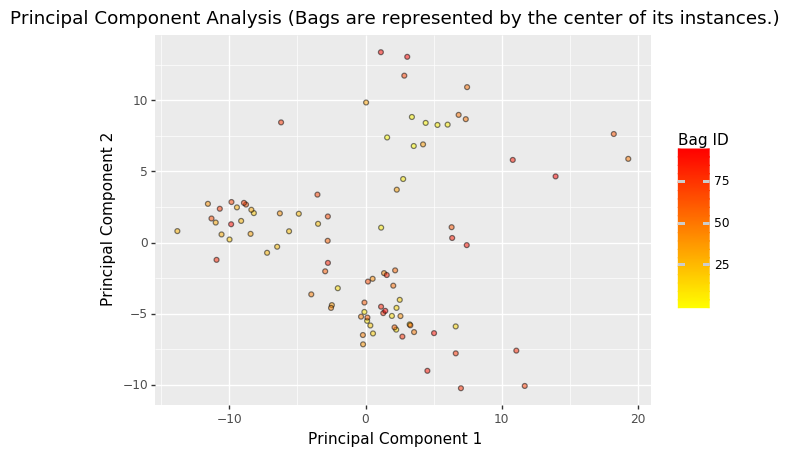

<ggplot: (-9223371940703093824)>

In [18]:
ggplot(
    df_pca_m_corr) + geom_point(aes(x = 'Component 1',y = 'Component 2',fill = 'Bag ID'),alpha = 0.5) +labs(
        title ='Principal Component Analysis (Bags are represented by the center of its instances.)',
        x = 'Principal Component 1',
        y = 'Principal Component 2',) +scale_fill_gradient(low="yellow",high="red")

In [20]:
explained_variance_c1=pca_m.explained_variance_ratio_[0]*100
explained_variance_c2=pca_m.explained_variance_ratio_[1]*100
sum_explained_variance=sum(pca_m.explained_variance_ratio_)*100
print('Principal Component 1 explains ' + str(round(explained_variance_c1,1)) + '% of the total variance')
print('Principal Component 2 explains ' + str(round(explained_variance_c2,1)) + '% of the total variance')
print('Total variance explained by the two components is ' + str(round(sum_explained_variance,1)) + '%')

Principal Component 1 explains 26.7% of the total variance
Principal Component 2 explains 19.1% of the total variance
Total variance explained by the two components is 45.7%


Even though we can talk about some clustering of the data in the figure above, it is hard to comment that this approach works well in this case.

In [21]:
#Perform Multi Dimensional Scaling 2D
mds_m=MDS(n_components = 2, random_state=35)    
mds_transformed_m = mds_m.fit_transform(std_x_m)
MDSdf_m = pd.DataFrame(data = mds_transformed_m , columns = ['MDS_1', 'MDS_2'])  #Multi Dimensional Scaling Df
df_mds_m = pd.concat([MDSdf_m, df_pca_m_corr['Bag ID']],axis=1)         #Add 'Bag class' as a Target Value to MDS Dataframe
df_mds_m.head()

,MDS_1,MDS_2,Bag ID
0,4.042165,-12.138677,1.0
1,0.052585,-12.125490,2.0
2,0.376384,-12.895944,3.0
3,3.402626,-12.863084,4.0
4,-0.969877,-15.586311,5.0


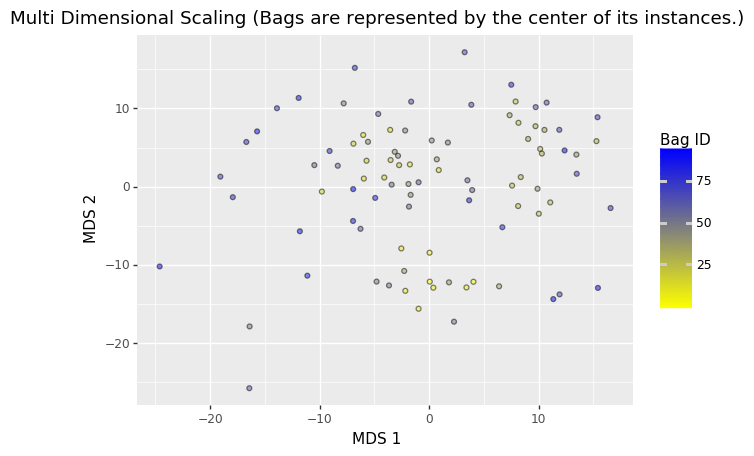

<ggplot: (-9223371940703055636)>

In [22]:
# MDS plot 2
ggplot(df_mds_m) + geom_point(aes(x = 'MDS_1',y = 'MDS_2',fill = 'Bag ID'),alpha = 0.5) +labs(title ='Multi Dimensional Scaling (Bags are represented by the center of its instances.)', x = 'MDS 1',y = 'MDS 2',)+scale_fill_gradient(low="yellow",high="blue") 

As there are few datapoints left in the graph, there is no clustering in the MDS graph above. As a result, taking mean of instances and using this as a center bag feature did not perform well in both cases.